<a href="https://colab.research.google.com/github/tatianaesc/estatisticadatascience/blob/master/EstatisticaParaDataScience_Cap6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capítulo 6 - Inferência Estatística: Noções de Amostragem e Reamostragem

In [38]:
# Habilita a execução de R no Google Colab
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


## Teorema Central do Limite

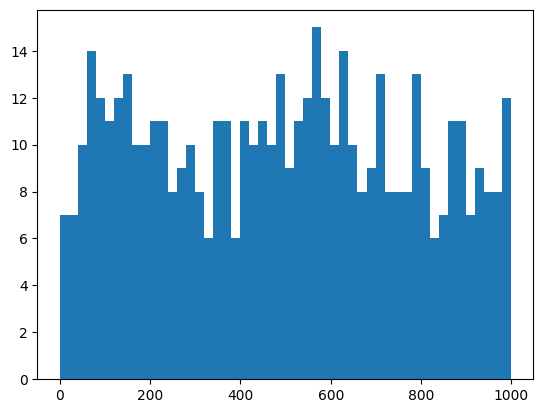

In [39]:
# Imports de bibliotecas
from sklearn.utils import resample
from matplotlib import pyplot as plt
import random
import statistics

# Dataset original

# Gerando 500 números aleatórios limitados ao valor 1000
lista_numeros = random.sample(range(1000), 500)

# Plotando o histograma da lista_numeros
plt.hist(lista_numeros, 50)
plt.show()

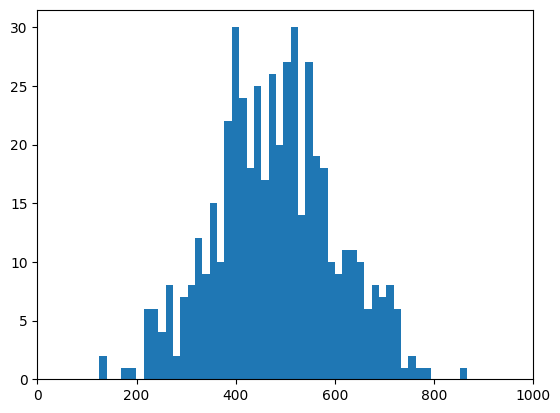

In [40]:
# 500 médias de 5 elementos - Os resultados podem variar devido à aleatoriedade da amostragem!

lista_medias_1 = []

for x in range (0,500): # 500 vezes
    # amostragem de tamanho 5, com reposição
    amostra = resample(lista_numeros, replace=True, n_samples=5)
    media = statistics.mean(amostra) # calcula a média
    lista_medias_1.append(media) # adiciona a média na lista

# Plotando o histograma das 500 médias de n = 5 elementos
plt.hist(lista_medias_1, 50)
plt.xlim(0, 1000)
plt.show()

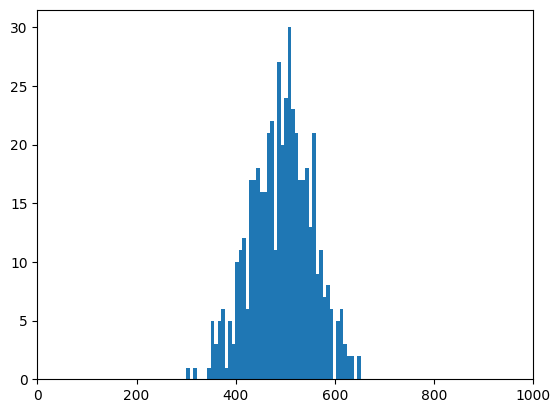

In [41]:
# 500 médias de 20 elementos - Os resultados podem variar devido à aleatoriedade da amostragem!

lista_medias_2 = []

for x in range (0,500): # 500 vezes
    # amostragem de tamanho 20, com reposição
    amostra = resample(lista_numeros, replace=True, n_samples=20)
    media = statistics.mean(amostra) # calcula a média
    lista_medias_2.append(media) # adiciona a média na lista

# Plotando o histograma das 500 médias de n = 20 elementos
plt.hist(lista_medias_2, 50)
plt.xlim(0, 1000)
plt.show()

## Amostragem Aleatória Simples (AAS)

In [42]:
%%R
# Fixando a semente aleatória para garantir a reprodutibilidade dos resultados
set.seed(7)

# População a ser amostrada
populacao = c(1,2,3,4,5,6,7,8,9,10)

# AAS com reposição de tamanho 5
print(sample(populacao, size=5, replace=T))

# AAS sem reposição de tamanho 7
print(sample(populacao, size=7, replace=F))

[1] 10  3  7  2 10
[1]  6  8  9  3 10  7  2


In [43]:
# Imports de bibliotecas
from sklearn.utils import resample

# População a ser amostrada
populacao = [1,2,3,4,5,6,7,8,9,10]

# AAS com reposição de tamanho 5
print(resample(populacao, replace=True, n_samples=5, random_state=7))

# AAS sem reposição de tamanho 7
print(resample(populacao, replace=False, n_samples=7, random_state=7))

[5, 10, 7, 4, 4]
[9, 6, 1, 3, 2, 10, 8]


## Amostragem Sistemática (AS)

In [44]:
%%R
# Fixando a semente aleatória para garantir a reprodutibilidade dos resultados
set.seed(7)

# Queremos escolher uma amostra (n) de 5 fichas, dentre uma população (N) de 5000 fichas:               -
n = 5
N = 5000

# Calculando o valor de k
k = floor(N / n)  # 1000 (divisão inteira)

# Sorteio da partida aleatória entre 1 e k
r = sample(1:k, size = 1)

# Gerando a amostra sistemática
amostra = seq(r, N, by = k)

# Exibindo a amostra
print(amostra)

[1]  298 1298 2298 3298 4298


In [45]:
# Imports de bibliotecas
import random

# Fixando a semente aleatória para garantir a reprodutibilidade dos resultados
random.seed(7)

# Queremos escolher uma amostra (n) de 5 fichas, dentre uma população (N) de 5000 fichas:               -
n = 5
N = 5000

# Calculando o valor de k
k = N // n  # 1000 (divisão inteira)

# Sorteio da partida aleatória entre 1 e k
r = random.randint(1, k)

# Gerando a amostra sistemática
amostra = list(range(r, N + 1, k))

# Exibindo a amostra
print(amostra)

[332, 1332, 2332, 3332, 4332]


## Amostragem Estratificada (AE)

In [46]:
%%R
# Tamanho da amostra (n) e dos estratos de população (N1 a N4)
n = 80
N1 = 500
N2 = 1200
N3 = 200
N4 = 100

# Tamanho total da população
N = N1 + N2 + N3 + N4

# Fração amostral
f = n / N

# Calculando os n´s para cada extrato com alocação proporcional ao tamanho do estrato
n1 = f*N1
n2 = f*N2
n3 = f*N3
n4 = f*N4

# Exibindo os tamanhos das amostras dos estratos
cbind(n1, n2, n3, n4)

     n1 n2 n3 n4
[1,] 20 48  8  4


In [47]:
# Tamanho da amostra (n) e dos estratos de população (N1 a N4)
n = 80
N1 = 500
N2 = 1200
N3 = 200
N4 = 100

# Tamanho total da população
N = N1 + N2 + N3 + N4

# Fração amostral
f = n / N

# Calculando os n´s para cada extrato com alocação proporcional ao tamanho do estrato
n1 = f*N1
n2 = f*N2
n3 = f*N3
n4 = f*N4

# Exibindo os tamanhos das amostras dos estratos
print("n1=%d n2=%d n3=%d n4=%d" % (n1, n2, n3, n4))

n1=20 n2=48 n3=8 n4=4


In [48]:
# Imports de bibliotecas
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Carregando o dataset Breast Cancer, convertendo para DataFrame e separando em X (atributos) e y (classe)
dataset = load_breast_cancer()
X = pd.DataFrame(dataset.data)
y = pd.DataFrame(dataset.target)

# Dividindo o dataset em conjuntos de treino (80%) e teste (20%), estratificando por y (classe do problema)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 7)

# Exibindo o tamanho de cada conjunto
print("X: {}".format(X.shape) + " - Y: {}".format(y.shape))
print("X_train: {}".format(X_train.shape) + " - y_train: {}".format(y_train.shape))
print("X_test: {}".format(X_test.shape) + " - y_test: {}".format(y_test.shape))

X: (569, 30) - Y: (569, 1)
X_train: (455, 30) - y_train: (455, 1)
X_test: (114, 30) - y_test: (114, 1)


## Amostragem por Conglomerado ou Cluster (AC)

In [49]:
# Imports de bibliotecas
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Carregando o dataset Breast Cancer, convertendo para DataFrame e adicionando a varável target
dataset = load_breast_cancer()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

# Dimensões do dataset original
print(df.shape)

# Amostragem por conglomerado - a amostra terá tamanho 50
amostra = df.sample(50, random_state=7)

# Dimensões da amostra
print(amostra.shape)

(569, 31)
(50, 31)


In [50]:
%%R
# Fixando a semente aleatória para garantir a reprodutibilidade dos resultados
set.seed(7)

# Queremos escolher uma amostra (n) de 1000 fichas, dentre uma população (N) de 5000 fichas:               -
n = 1000
N = 5000

# Calculando o valor de k
k = N / n # 5

# Sortearemos um valor r entre 1 e k (partida aleatória)
r = sample(k, size=1)

# Amostra
print(seq(r, N ,k))

   [1]    2    7   12   17   22   27   32   37   42   47   52   57   62   67
  [15]   72   77   82   87   92   97  102  107  112  117  122  127  132  137
  [29]  142  147  152  157  162  167  172  177  182  187  192  197  202  207
  [43]  212  217  222  227  232  237  242  247  252  257  262  267  272  277
  [57]  282  287  292  297  302  307  312  317  322  327  332  337  342  347
  [71]  352  357  362  367  372  377  382  387  392  397  402  407  412  417
  [85]  422  427  432  437  442  447  452  457  462  467  472  477  482  487
  [99]  492  497  502  507  512  517  522  527  532  537  542  547  552  557
 [113]  562  567  572  577  582  587  592  597  602  607  612  617  622  627
 [127]  632  637  642  647  652  657  662  667  672  677  682  687  692  697
 [141]  702  707  712  717  722  727  732  737  742  747  752  757  762  767
 [155]  772  777  782  787  792  797  802  807  812  817  822  827  832  837
 [169]  842  847  852  857  862  867  872  877  882  887  892  897  902  907

## Reamostragem

In [51]:
# Bootstrap - Os resultados podem variar devido à aleatoriedade da amostragem!

# Imports de bibliotecas
from sklearn.utils import resample

# Amostra
amostra = [1, 2, 3, 4, 5, 6, 7]

# Vamos gerar 5 subamostras de tamanho 4
for i in range (1,6):
    # Reamostragem com boostrap
    subamostra = resample(amostra, replace=True, n_samples=4)
    print('Subamostra %d com Bootstrap: %s' % (i, subamostra))

    # Observações out of bag
    oob = [x for x in amostra if x not in subamostra]
    print('Observações OOB para %d: %s' % (i, oob))

Subamostra 1 com Bootstrap: [5, 3, 2, 2]
Observações OOB para 1: [1, 4, 6, 7]
Subamostra 2 com Bootstrap: [4, 4, 4, 4]
Observações OOB para 2: [1, 2, 3, 5, 6, 7]
Subamostra 3 com Bootstrap: [7, 5, 1, 2]
Observações OOB para 3: [3, 4, 6]
Subamostra 4 com Bootstrap: [2, 4, 3, 5]
Observações OOB para 4: [1, 6, 7]
Subamostra 5 com Bootstrap: [1, 1, 3, 3]
Observações OOB para 5: [2, 4, 5, 6, 7]


In [52]:
# Validação cruzada 3-fold

# Imports de bibliotecas
from numpy import array
from sklearn.model_selection import KFold

# Amostra
amostra = array([1, 2, 3, 4, 5, 6, 7])

# Preparação da validação cruzada
kfold = KFold(n_splits=3, shuffle=True, random_state=7)

# Folds geradas
for train, test in kfold.split(amostra):
    print('Treino: %s, Teste: %s' % (amostra[train], amostra[test]))

Treino: [2 4 5 7], Teste: [1 3 6]
Treino: [1 2 3 5 6], Teste: [4 7]
Treino: [1 3 4 6 7], Teste: [2 5]


## Intervalos de Confiança

In [53]:
import numpy as np
from sklearn.model_selection import cross_val_score
from scipy import stats

# Temos um conjunto de dados e um modelo de classificação
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Carregando o conjunto de dados
iris = load_iris()
X = iris.data
y = iris.target

# Criando um modelo
clf = DecisionTreeClassifier()

# Realizando a validação cruzada com 5 folds
scores = cross_val_score(clf, X, y, cv=5, scoring = 'accuracy')

# Calculando a média das acurácias
mean_score = np.mean(scores)

# Calculando o desvio padrão das acurácias
std_deviation = np.std(scores)

# Calculando o intervalo de confiança de 95% para as acurácias
confidence_interval = stats.t.interval(0.95, len(scores) - 1, loc=mean_score, scale=std_deviation / np.sqrt(len(scores)))

print("Média das Acurácias:", mean_score)
print("Desvio Padrão das Acurácias:", std_deviation)
print("Intervalo de Confiança (95%):", confidence_interval)

Média das Acurácias: 0.9600000000000002
Desvio Padrão das Acurácias: 0.03265986323710903
Intervalo de Confiança (95%): (0.9194474236322232, 1.0005525763677772)
